    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Done
Degree 2 Polynomial Regression:
Mean Squared Error (MSE): 13.760855128148345
Root Mean Squared Error (RMSE): 3.709562659957147
R² Score: 0.7440623896917427
--------------------------------------------------
Degree 3 Polynomial Regression:
Mean Squared Error (MSE): 13.813374

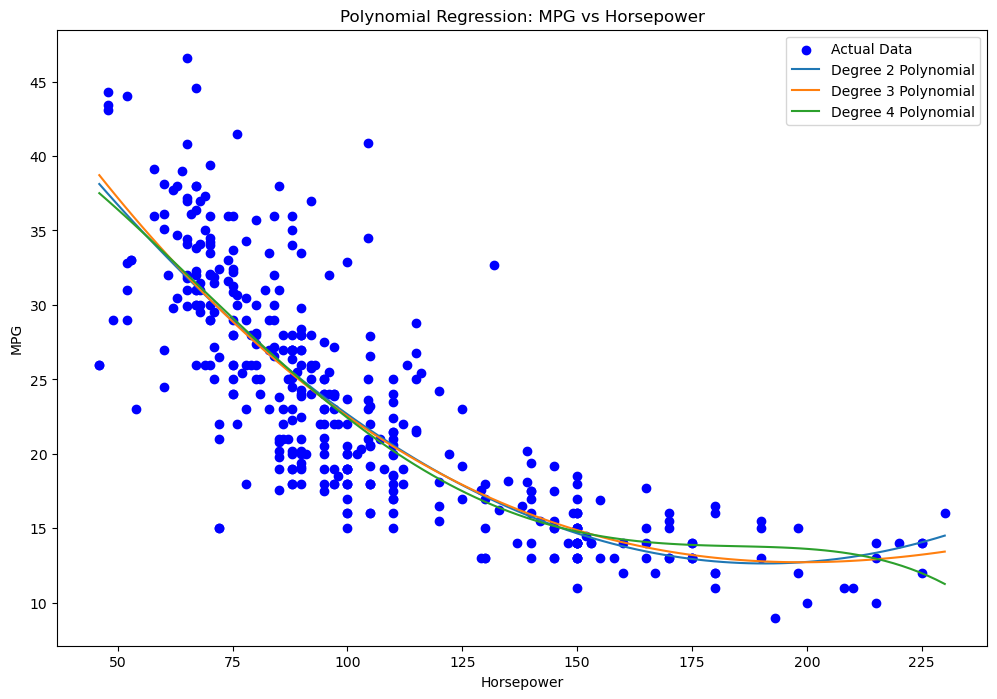

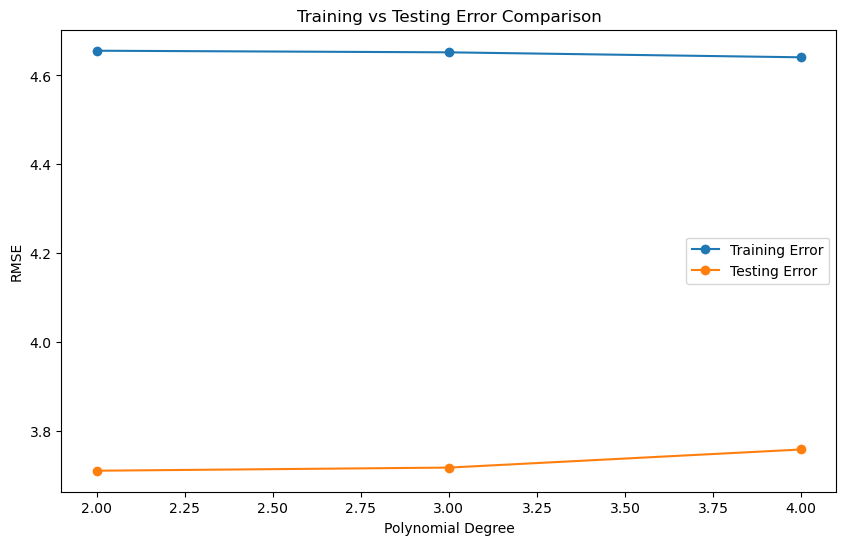

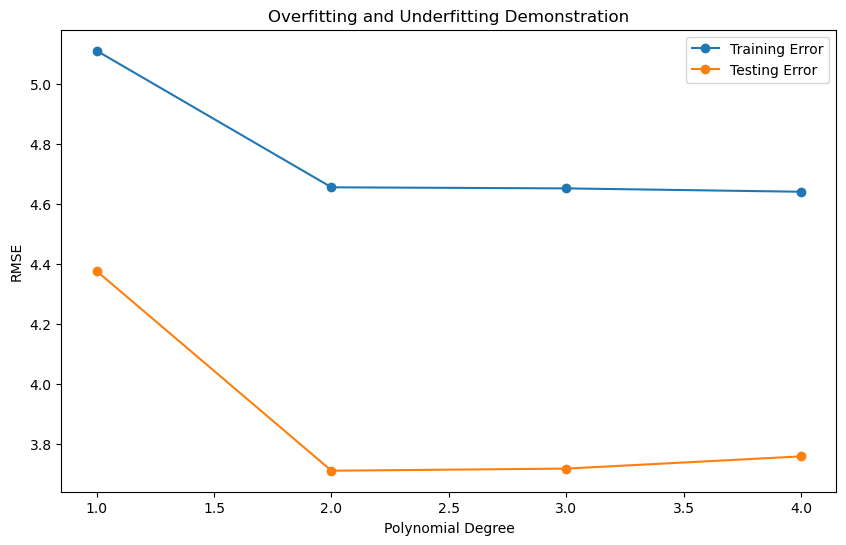

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Import required Python libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Step 2: Load and clean the Auto MPG dataset
df = pd.read_csv("auto-mpg.csv")

print(df.head())

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')


imputer = SimpleImputer(strategy='mean')
df['horsepower'] = imputer.fit_transform(df[['horsepower']])
df['mpg'] = imputer.fit_transform(df[['mpg']])

X = df[['horsepower']].values  
y = df['mpg'].values  
print("Done")
  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

degrees = [2, 3, 4]
models = {}
for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    models[degree] = model
    
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"Degree {degree} Polynomial Regression:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R² Score: {r2}")
    print('-' * 50)

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    ridge_model = Ridge(alpha=1)
    ridge_model.fit(X_train_poly, y_train)

    y_pred_ridge = ridge_model.predict(X_test_poly)
    
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    print(f"Ridge Regression (Degree {degree}):")
    print(f"Mean Squared Error (MSE): {mse_ridge}")
    print(f"Root Mean Squared Error (RMSE): {rmse_ridge}")
    print(f"R² Score: {r2_ridge}")
    print('-' * 50)


plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='blue', label='Actual Data')
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_range_poly = poly.fit_transform(x_range_scaled)
    y_range_pred = models[degree].predict(X_range_poly)
    
    plt.plot(x_range, y_range_pred, label=f'Degree {degree} Polynomial')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Polynomial Regression: MPG vs Horsepower')
plt.legend()
plt.show()

train_errors = []
test_errors = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = models[degree]
    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)
    
    train_errors.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_errors.append(np.sqrt(mean_squared_error(y_test, test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Training Error', marker='o')
plt.plot(degrees, test_errors, label='Testing Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Training vs Testing Error Comparison')
plt.legend()
plt.show()

train_errors_all = []
test_errors_all = []

for degree in range(1, 5):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    train_pred = model.predict(X_train_poly)
    test_pred = model.predict(X_test_poly)

    train_errors_all.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_errors_all.append(np.sqrt(mean_squared_error(y_test, test_pred)))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), train_errors_all, label='Training Error', marker='o')
plt.plot(range(1, 5), test_errors_all, label='Testing Error', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Overfitting and Underfitting Demonstration')
plt.legend()
plt.show()

 